<a href="https://colab.research.google.com/github/CivitCihan/ML_Classification/blob/main/LogisticClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosyanın yolunu belirle
file_path = '/content/drive/My Drive/diabetes.csv'  # Dosyanın tam yolu

# Veriyi oku
df = pd.read_csv(file_path)
df = df.dropna()
df.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
log_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [ ]:
print(log_model.intercept_)
print(log_model.coef_)

[-5.77585044]
[[ 0.06122081  0.02619195 -0.01664962 -0.0021784  -0.00028229  0.064291
   0.25124695  0.02212088]]


In [ ]:
y_pred = log_model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [ ]:
log_model.predict_proba(X_test)[0:10]

array([[0.66547432, 0.33452568],
       [0.7758126 , 0.2241874 ],
       [0.80311141, 0.19688859],
       [0.78019086, 0.21980914],
       [0.55046719, 0.44953281],
       [0.57714102, 0.42285898],
       [0.94456427, 0.05543573],
       [0.33869284, 0.66130716],
       [0.46984139, 0.53015861],
       [0.32277768, 0.67722232]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[126,  25],
       [ 32,  48]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



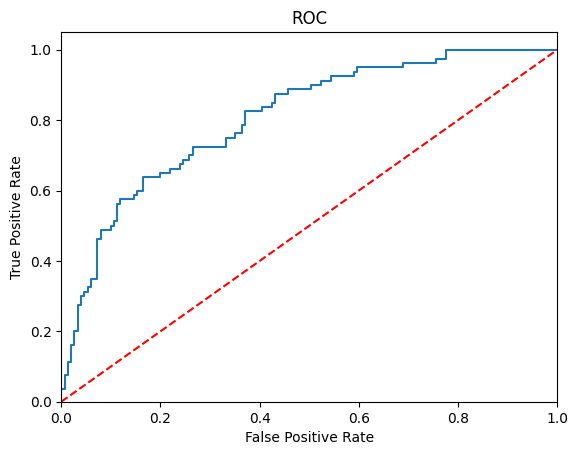

In [ ]:
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
cross_val_score(log_model, X_test, y_test, cv=10).mean()

0.7748188405797102